In [168]:
import hvplot.pandas
import rasterio as rio
import numpy as np
import pandas as pd
import geopandas as gpd
from pathlib import Path
from tqdm.notebook import tqdm
from datetime import datetime
from shapely.geometry import box
from einops import rearrange

In [169]:
SHAPEFILE_ROOT = Path('data/ML_training_labels/retrogressive_thaw_slumps/')
SENTINEL_ROOT = Path('data/Sentinel2') 

labels = map(gpd.read_file, SHAPEFILE_ROOT.glob('*/TrainingLabel*.shp'))
labels = pd.concat(labels).reset_index(drop=True)
labels['image_date'] = pd.to_datetime(labels['image_date'])

In [177]:
mindim = float('inf')

TILESIZE = 192

for imageid, group in labels.groupby('image_id'):
  for s2img in (SENTINEL_ROOT / imageid).glob('*.tif'):
    with rio.open(s2img) as raster:
      H, W = raster.shape
      mask = rio.features.rasterize(labels.geometry.to_crs(raster.crs),
                                    out_shape=img.shape[1:], transform=raster.transform)

(173, 387)


In [181]:
str(raster.crs)

'EPSG:32645'

In [149]:
mindim = float('inf')

for imageid, labels in labels.groupby('image_id'):
  for s2img in (SENTINEL_ROOT / imageid).glob('*.tif'):
    with rio.open(s2img) as raster:
      mindim = min(mindim, *raster.shape)
      print(raster.shape)
    #  mask = rio.features.rasterize(labels.geometry.to_crs(raster.crs),
    #                                out_shape=img.shape[1:], transform=raster.transform)
      
      
    # profile = {k: raster.profile[k] for k in ['width', 'height', 'crs', 'transform', 'driver']}
    # with rio.open(s2img.parent / f'{s2img.stem}_mask.tif', 'w', dtype=np.uint8,
    #   count=1, **profile) as out_raster:
    #   out_raster.write(mask, 1) 
mindim

(1001, 1001)
(1001, 1001)
(1001, 1001)
(337, 865)
(337, 865)
(337, 865)
(992, 1001)
(667, 1002)
(928, 1088)
(928, 1088)
(983, 1095)
(983, 1095)
(983, 1095)
(794, 1002)
(699, 1002)
(1001, 1001)
(1001, 1001)
(430, 1002)
(430, 1002)
(765, 1002)
(765, 1002)
(765, 1002)
(601, 1057)
(601, 1057)
(605, 1001)
(991, 1096)
(991, 1096)
(1002, 1001)
(537, 1001)
(537, 1001)
(537, 1001)
(537, 1001)
(537, 1001)
(537, 1001)
(934, 1089)
(934, 1089)
(934, 1089)
(482, 1001)
(482, 1001)
(482, 1001)
(1001, 1002)
(1001, 1002)
(1001, 1002)
(696, 1065)
(696, 1065)
(696, 1065)
(696, 1065)
(696, 1065)
(703, 1066)
(867, 1082)
(977, 1001)
(977, 1001)
(977, 1001)
(500, 1002)
(500, 1002)
(500, 1002)
(617, 1001)
(617, 1001)
(890, 1002)
(890, 1002)
(493, 995)
(493, 995)
(493, 995)
(493, 995)
(987, 1094)
(987, 1094)
(987, 1094)
(987, 1094)
(298, 603)
(298, 603)
(298, 603)
(298, 603)
(784, 1001)
(784, 1001)
(784, 1001)
(700, 1001)
(700, 1001)
(700, 1001)
(503, 1002)
(503, 1002)
(503, 1002)
(503, 1002)
(1001, 1002)
(1001

173

In [150]:
len(labels.groupby('image_id'))

1

In [93]:
s2img.parent

PosixPath('data/Sentinel2/4770635_4572716_2021-08-06_2416')

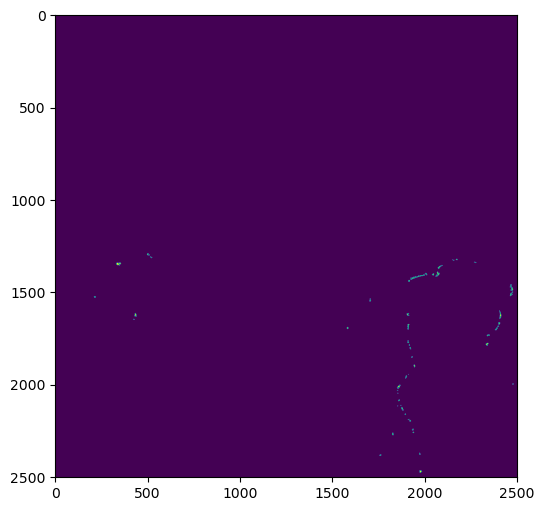

In [73]:
plt.imshow(mask)

In [194]:
root = Path('data/Sentinel2/4770635_4572716_2021-08-06_2416/')

with rio.open(root / '20210806T064629_20210806T064625_T45XWA.tif') as raster:
  print(raster.shape)
  print(raster.descriptions)
  
with rio.open(root / 'TCVIS.tif') as raster:
  print(raster.shape)

(2502, 2501)
('B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 'QA10', 'QA20', 'QA60', 'FILL_MASK', 'CLOUD_MASK', 'CLOUDLESS_MASK', 'SHADOW_MASK', 'CLOUD_PROB', 'CLOUD_DIST')


RasterioIOError: data/Sentinel2/4770635_4572716_2021-08-06_2416/TCVIS.tif: No such file or directory

In [190]:
for subdir in Path('data/Sentinel2/').glob('*'):
  crss = []
  for tif in subdir.glob('*.tif'):
    try: crss.append(str(rio.open(tif).crs))
    except: pass
  if len(set(crss)) > 1:
    print(crss)

['EPSG:32610', 'EPSG:32611', 'EPSG:32610', 'EPSG:32611', 'EPSG:32610', 'EPSG:32611']
['EPSG:32611', 'EPSG:32610', 'EPSG:32611', 'EPSG:32610', 'EPSG:32611', 'EPSG:32610']
['EPSG:32610', 'EPSG:32610', 'EPSG:32611']
['EPSG:32644', 'EPSG:32644', 'EPSG:32643']
['EPSG:32611', 'EPSG:32610', 'EPSG:32611', 'EPSG:32610', 'EPSG:32611', 'EPSG:32610']
['EPSG:32610', 'EPSG:32611', 'EPSG:32610', 'EPSG:32611', 'EPSG:32610', 'EPSG:32611']
['EPSG:32610', 'EPSG:32611']
['EPSG:32639', 'EPSG:32639', 'EPSG:32638', 'EPSG:32638', 'EPSG:32639', 'EPSG:32639']
['EPSG:32610', 'EPSG:32611', 'EPSG:32610', 'EPSG:32611', 'EPSG:32610', 'EPSG:32611']
['EPSG:32610', 'EPSG:32610', 'EPSG:32611']
['EPSG:32649', 'EPSG:32649', 'EPSG:32649', 'EPSG:32650', 'EPSG:32650', 'EPSG:32650']


In [200]:
list({2:3, 4:4}.values())

[3, 4]